# **Sales Analysis**

**Project Objective :** The aim of the project is to use Python Pandas and Python Matplotlib to analyze and answer business questions about 12 months worth of sales data.

**About Dataset :** The dataset consist of 12 csv files with sales data for each month. It contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

**Business Questions :**

Five high level business questions related to our data are addressed in this analysis. They are:-

1.   Which was the best month for sales? How much was earned that month?
2.   Which city sold the most products?

3.   What time should we display advertisements to maximize the likelihood of customers buying product?
4.   What products are most often sold together?

5.   What product sold the most? Why do you think it sold the most?


To answer these questions we walk through many different pandas & matplotlib methods. They include:

*   Concatenating multiple csvs together to create a new DataFrame (pd.concat)
*   Adding new columns
*   Parsing cells as strings to make new columns (.str)

*   Using the .apply() method and .transform() method
*   Using groupby to perform aggregate analysis


*   Plotting bar charts and lines graphs to visualize our results
*   Labeling our graphs


#### **Import the necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

 **Merging 12 months of sales data in to a single CSV file**

In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/Datasets/Sales_Data')]

#Create an empty datadrame

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Datasets/Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_month_data.csv", index=False)

### **Read in updated Dataframe**

In [ ]:
all_data= pd.read_csv('/content/all_month_data.csv')
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


**Understanding the Data**

In [ ]:
all_data.shape

(186850, 6)

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### **Clean up the Data!**

We start by cleaning our data. Tasks during this section include:

*   Drop NaN values from DataFrame
*   Removing rows based on a condition
*   Change the type of columns (to_numeric, to_datetime, astype)



### Drop rows of NaN

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data = all_data.dropna(how = "all")
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Find 'Or' and Delete it

In [ ]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]


### Convert columns to the correct type

In [ ]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### **Augment Data with Additional Columns**

**Add a Month Column**

In [ ]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype('int32')

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1


**Add a Sales column**

In [ ]:
all_data["Sales"] = all_data["Price Each"] * all_data["Quantity Ordered"]
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98


**Add a City Column**

In [ ]:
#Lets use .apply()
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


Now let's step in to analysis section.

## **Qsn1: Which was the best month for sales? How much was earned that month?**

In [ ]:
results = all_data.groupby('Month').sum()


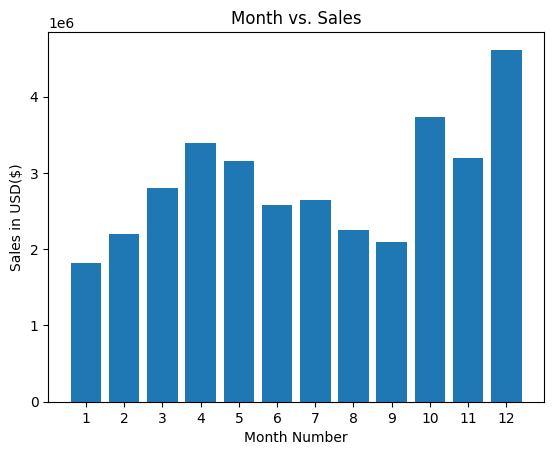

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month Number")
plt.title("Month vs. Sales")
plt.show()

The maximum sales is during the month of December. This trend may be due to Christmas and New Year holidays. It is during this season discounts and combo deals are offered. So that may be the reason for maximum sales.

## **Qsn2: Which city had the highest number of sales?**

In [ ]:
city_results = all_data.groupby('City').sum()
city_results



,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


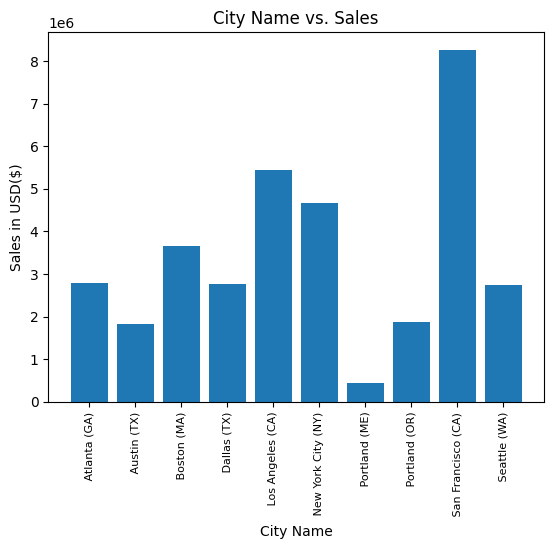

In [ ]:
cities =[city for city,df in all_data.groupby("City")]

plt.bar(cities, city_results["Sales"])
plt.xticks(cities, rotation = 'vertical',size=8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City Name")
plt.title("City Name vs. Sales")
plt.show()

San Francisco tops the list. This maybe due to the demography in SF maybe favourable for electronic gadget sales. Also the people can afford gadgets like IPhones, Macbooks etc..Lot of companies are also Sf based. So the purchases by those companies maybe a reason for higher sales.

### **Qsn3: What time should we display advertisements to maximise the likelihood of customer's buying product?**

In [ ]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [ ]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33


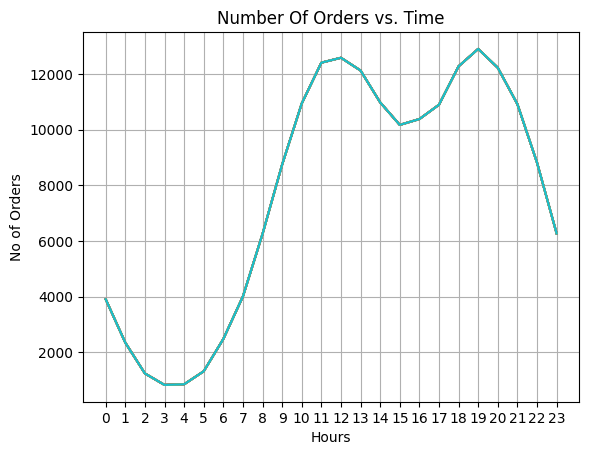

In [ ]:
hours =[hour for hour,df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("No of Orders")
plt.title("Number Of Orders vs. Time")
plt.show()


The peak order placing time is 11 AM and 7 PM. So displaying advertisements around 10 AM to 12 PM and evening 6 Pm to 9 PM is my recommendation.

### **Qsn4: What products are often sold together?**

In [ ]:
#If the products have same order id we can assume that they were bought together

df = all_data[all_data["Order ID"].duplicated(keep = False)]

In [ ]:
#Create a new column Grouped

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

#Remove duplicates

df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head(4)

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


iPhone and Lightning Charging Cable are bought together the most. Followed by Google Phone and USB-C Charging cable. This data is very much useful for coming up with best combos, Smart deals, Promotions etc..

### **Qsn5: What products sold the most? Why do you think it sold the most?**

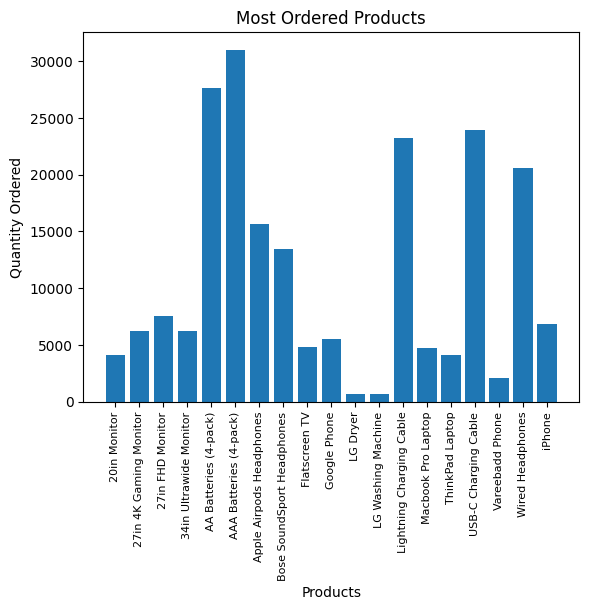

In [ ]:
product_group = all_data.groupby("Product")
quantity = product_group.sum()["Quantity Ordered"]


products = [product for product, df in product_group]

plt.bar(products,quantity)
plt.xticks(products,rotation = 'vertical', size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.title("Most Ordered Products")
plt.show()

The AAA Batteries and AA Batteries are sold the most. The charging cables are also in high demand.

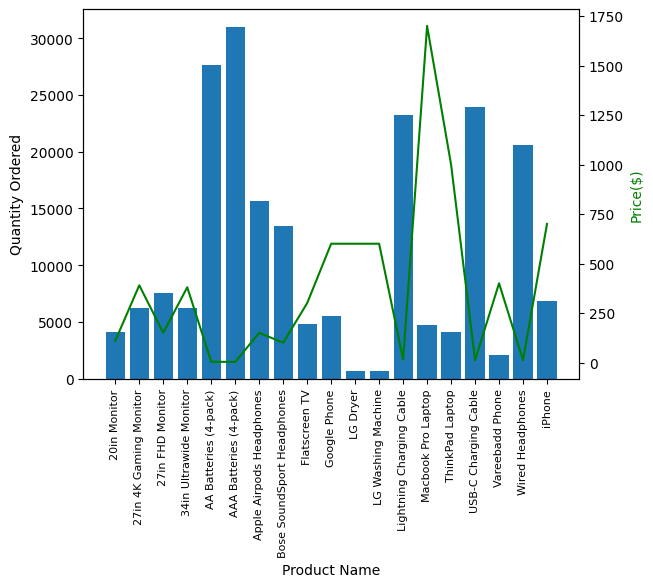

In [ ]:
prices = all_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity)
ax2.plot(products, prices,"g-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price($)", color ="green")
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()



*   The reason for maximum sales of the Batteries is because it is cheap and more people can afford them.
*   Same can be the reason behind the sales of charging cables and wired headphones.

*   The batteries and cables are often replaced, so that can also be another reason.
*   LG Dryer and Washing Machines are slightly expensive and not replaced regularly, so its sales are pretty down.
*   But laptops have good sales despite its high price, this maybe due to its necessity in today's world.





# **Recommendations**
The Sales analysis helped us to understand the data and derive business insights that can add value to the marketing strategy designing. Here are some recommendations to improve the sales:


*   The stores can offer more Holiday special offers like Christmas and New Year Deals

*   Targeted Marketing in cities with poor sales like Portland(ME)

*   Advertising more around the peak time like around 11 AM and 7 PM
*   Coming up with more combo offers as explained before.


*   Explore the reasons for poor sales of certain gadgets and devise some new sales strategy.